<a href="https://colab.research.google.com/github/Mvital74/DSWP/blob/master/Churn_pred_exc_feat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install pycaret

#Importar Bibliotecas


In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from pycaret.classification import *

#Carregar Dataframes

In [131]:
df_sample = pd.read_csv('https://raw.githubusercontent.com/Mvital74/datasharing/master/sample_submission.csv', index_col='id')
df_test = pd.read_csv('https://raw.githubusercontent.com/Mvital74/datasharing/master/test.csv', index_col='id')
df_train =pd.read_csv('https://raw.githubusercontent.com/Mvital74/datasharing/master/train.csv', index_col='id')

df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [132]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
id,,,,,,,,,,,,,,,,,,,
5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


#Explora Dataframes

In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   tenure            5173 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5535 non-null   object

In [145]:

df_train[df_train['MonthlyCharges'].isalnum() == False]

AttributeError: ignored

#Trata Dataframe de treinamento

1.   Item da lista
2.   Item da lista



## Tratar os NA


In [135]:
df_tenure = df_train.groupby(['Contract']).agg({'tenure': ['mean', 'median']})
df_tenure

tenure       
                     mean median
Contract                        
Month-to-month  17.943697   12.0
One year        41.910665   44.0
Two year        56.396965   64.0

In [136]:
df_month = df_train[df_train['Contract']=='Month-to-month']
df_month['tenure'].fillna(df_month['tenure'].mean(), inplace=True)
df_one = df_train[df_train['Contract']=='One year']
df_one['tenure'].fillna(df_one['tenure'].mean(), inplace=True)
df_two = df_train[df_train['Contract']=='Two year']
df_two['tenure'].fillna(df_two['tenure'].mean(), inplace=True)
df_train_na = pd.concat([df_month, df_one, df_two], axis=0)

In [137]:
df_train_na['Dependents'].value_counts()


No     3793
Yes    1623
Name: Dependents, dtype: int64

In [138]:
df_train_na['Dependents'].fillna('No', inplace=True)

In [149]:
df_train_na['PaymentMethod'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

In [151]:
df_train_na['PaymentMethod'].fillna(method='ffill', inplace = True)

In [152]:
df_train_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 6861 to 6317
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   objec



```
# Isto está formatado como código
```

##Drop "TotalCharges"

In [153]:
df_train_na.drop(columns=['TotalCharges'])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
id,,,,,,,,,,,,,,,,,,,
6861,Female,0,No,No,37.000000,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,1
3266,Male,0,Yes,Yes,29.000000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1
4476,Female,0,No,No,3.000000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.55,0
3145,Male,0,No,No,6.000000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.95,0
2140,Female,0,No,No,7.000000,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,66.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Male,1,Yes,No,71.000000,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.95,0
2873,Female,0,Yes,Yes,42.000000,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,22.95,0
4304,Female,0,Yes,No,45.000000,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.50,0


In [74]:
categorical = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
               'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
               'Contract','PaperlessBilling','PaymentMethod', 'SeniorCitizen']
numerical = ['tenure','MonthlyCharges']

In [154]:
df_train_eda = pd.concat([pd.get_dummies(df_train_na[categorical]),df_train_na[numerical], df_train_na['Churn']], axis=1)
df_train_eda.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6861,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,37.0,101.90,3545.35,1
3266,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,29.0,70.75,1974.8,1
4476,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,3.0,19.55,61.05,0
3145,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,6.0,18.95,110.15,0
2140,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,7.0,66.85,458.1,0


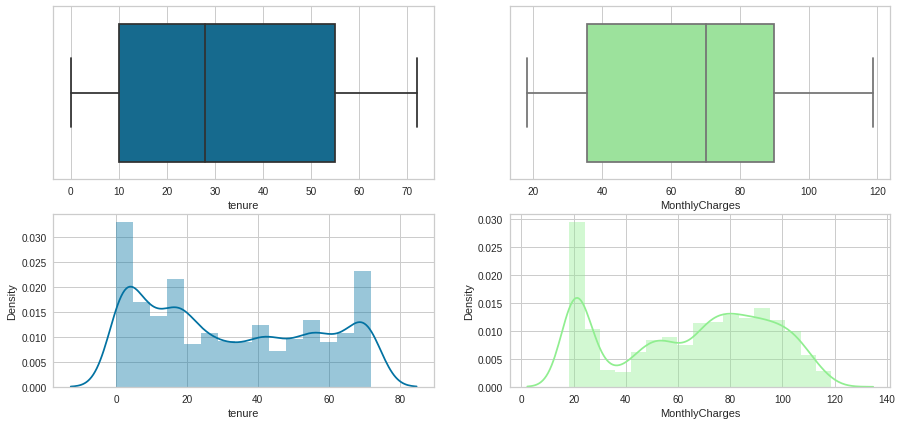

In [156]:
fig, axs = plt.subplots(2,2, figsize=(15,7), sharey=False);
sns.boxplot(df_train_eda['tenure'], ax=axs[0,0]);
sns.boxplot(df_train_eda['MonthlyCharges'], ax=axs[0,1], color='lightgreen');
sns.distplot(df_train_eda['tenure'], ax=axs[1,0]);
sns.distplot(df_train_eda['MonthlyCharges'], ax=axs[1,1], color='lightgreen');


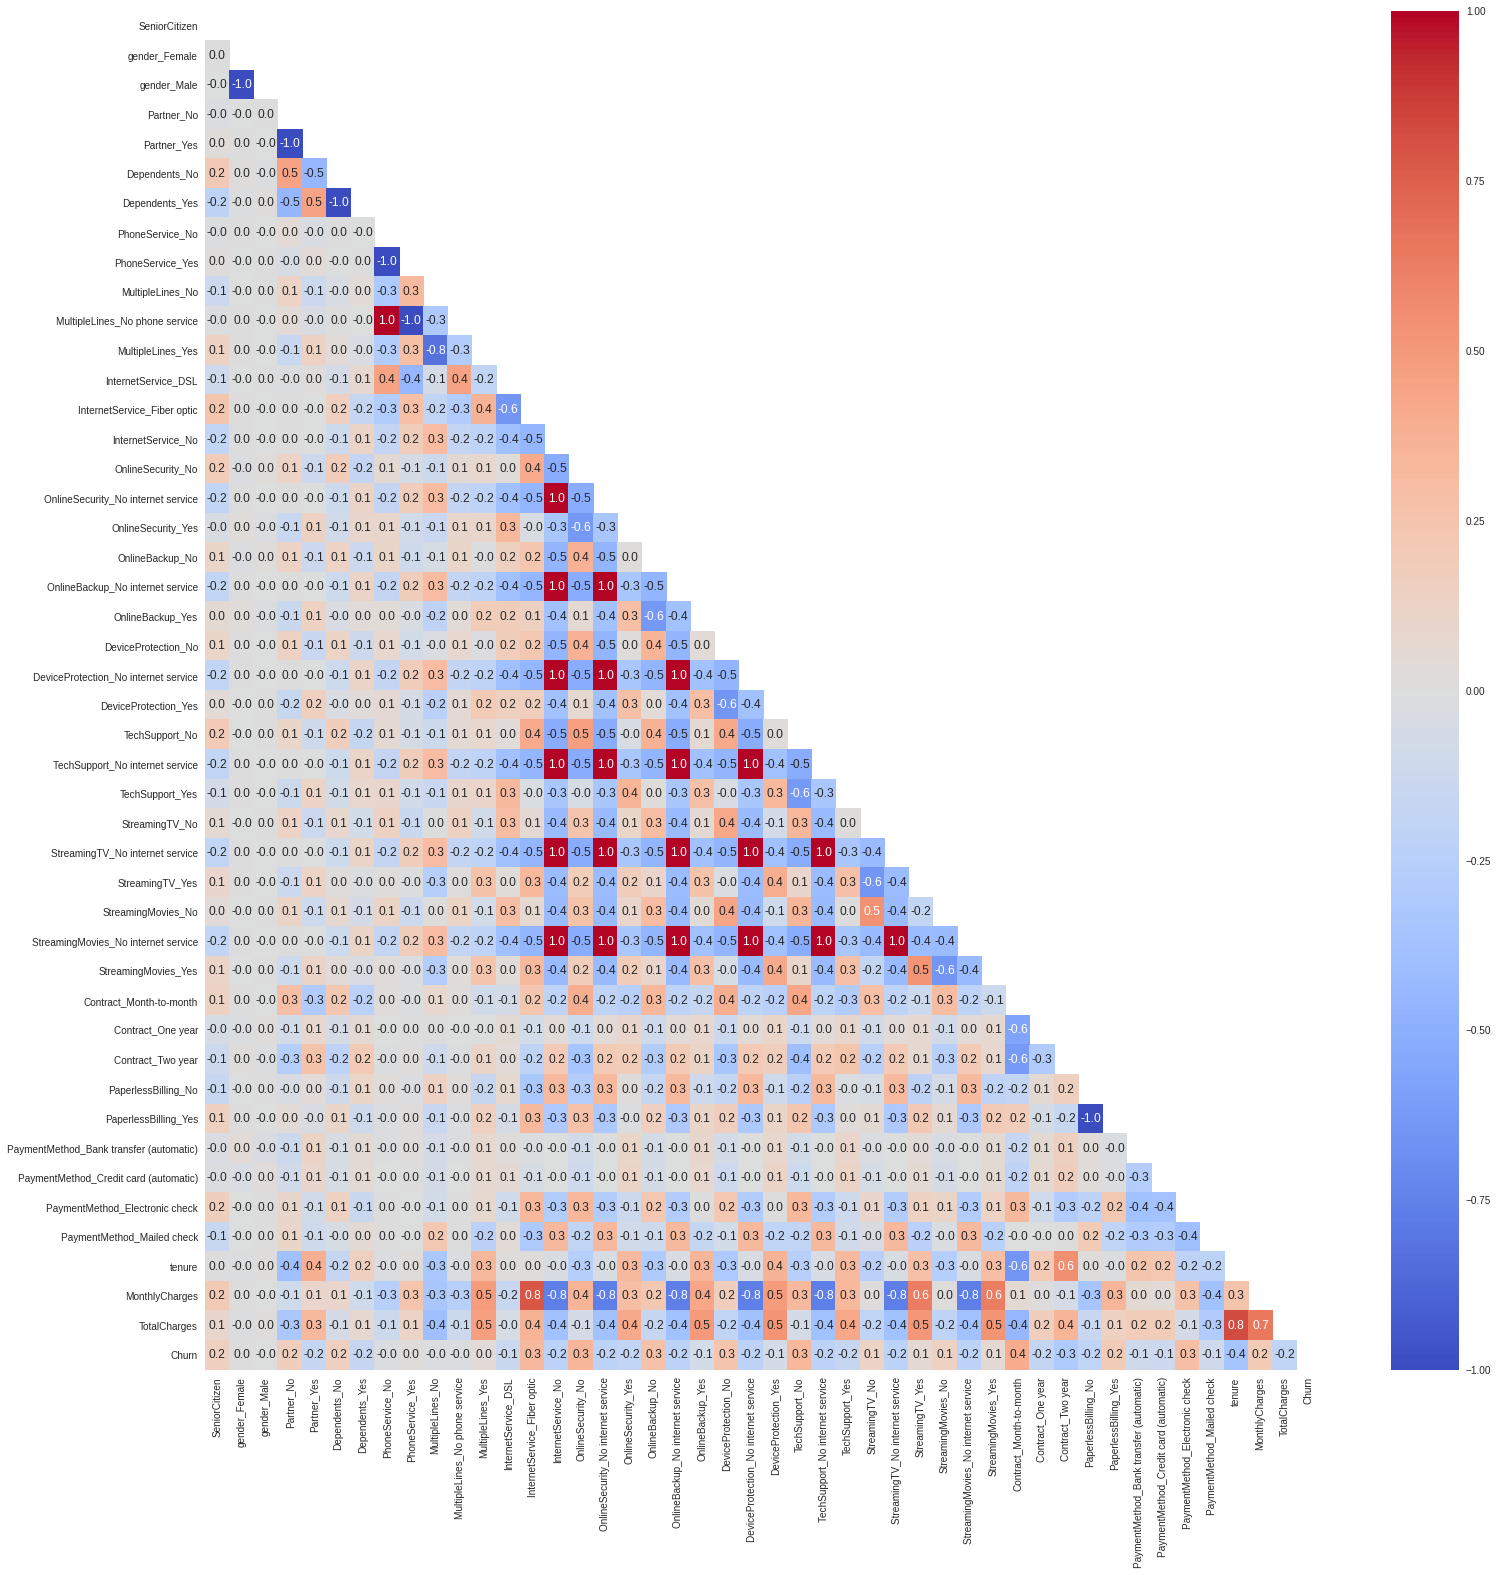

In [77]:
# Correlation
fig, ax = plt.subplots(figsize=(25,25))
mask = np.triu(df_train_eda.corr())
sns.heatmap(df_train_eda.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1f', mask=mask, ax=ax);

### Trata Dataframe de teste

In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 5027 to 5773
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1409 non-null   object 
 1   SeniorCitizen     1409 non-null   int64  
 2   Partner           1409 non-null   object 
 3   Dependents        1368 non-null   object 
 4   tenure            1291 non-null   float64
 5   PhoneService      1409 non-null   object 
 6   MultipleLines     1409 non-null   object 
 7   InternetService   1409 non-null   object 
 8   OnlineSecurity    1409 non-null   object 
 9   OnlineBackup      1409 non-null   object 
 10  DeviceProtection  1409 non-null   object 
 11  TechSupport       1409 non-null   object 
 12  StreamingTV       1409 non-null   object 
 13  StreamingMovies   1409 non-null   object 
 14  Contract          1409 non-null   object 
 15  PaperlessBilling  1409 non-null   object 
 16  PaymentMethod     1379 non-null   objec

In [79]:
#Trata os NA do conjunto de teste com os valores mais frequentes
cols_to_impute = ['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges']
imputer = SimpleImputer(strategy='most_frequent')
df_test[cols_to_impute] = imputer.fit_transform(df_test[cols_to_impute])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 5027 to 5773
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1409 non-null   object 
 1   SeniorCitizen     1409 non-null   int64  
 2   Partner           1409 non-null   object 
 3   Dependents        1409 non-null   object 
 4   tenure            1409 non-null   float64
 5   PhoneService      1409 non-null   object 
 6   MultipleLines     1409 non-null   object 
 7   InternetService   1409 non-null   object 
 8   OnlineSecurity    1409 non-null   object 
 9   OnlineBackup      1409 non-null   object 
 10  DeviceProtection  1409 non-null   object 
 11  TechSupport       1409 non-null   object 
 12  StreamingTV       1409 non-null   object 
 13  StreamingMovies   1409 non-null   object 
 14  Contract          1409 non-null   object 
 15  PaperlessBilling  1409 non-null   object 
 16  PaymentMethod     1409 non-null   objec

In [80]:
#Transforma 'TotalCharges' para numérico
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'], errors='coerce')

In [81]:
df_test_eda = pd.concat([pd.get_dummies(df_test[categorical]),df_test[numerical]], axis=1)
df_test_eda.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5027,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,23.0,20.00,445.30
1733,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,61.0,99.00,5969.30
5384,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,36.0,84.75,3050.15
6554,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,61.0,61.45,3751.15
364,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,47.0,20.55,945.70


#Configurando Pycaret

In [18]:
clf = setup(df_train_eda, 
             target = 'Churn', 
             session_id=1, 
             ##log_experiment=True,
             train_size=0.75,
             #fix_imbalance=True,
             normalize = True,
             normalize_method = 'robust',
             ##transformation = True,
             experiment_name='base_line1')

,Description,Value
0,session_id,1
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4884, 46)"
5,Missing Values,True
6,Numeric Features,44
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


##Comparando os modelos

In [19]:
Modelos_resultados = compare_models()
Modelos_resultados

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8119,0.8495,0.5511,0.6718,0.6044,0.4828,0.4875,0.355
lda,Linear Discriminant Analysis,0.8051,0.8416,0.5615,0.6472,0.6000,0.4723,0.4751,0.037
gbc,Gradient Boosting Classifier,0.8048,0.8459,0.5312,0.6585,0.5863,0.4608,0.4664,0.511
ada,Ada Boost Classifier,0.8043,0.8440,0.5406,0.6549,0.5902,0.4635,0.4684,0.220
ridge,Ridge Classifier,0.8040,0.0000,0.5093,0.6639,0.5750,0.4508,0.4583,0.022
catboost,CatBoost Classifier,0.8037,0.8386,0.5280,0.6554,0.5835,0.4573,0.4627,3.458
lightgbm,Light Gradient Boosting Machine,0.7966,0.8305,0.5334,0.6350,0.5778,0.4455,0.4496,0.118
rf,Random Forest Classifier,0.7911,0.8252,0.4885,0.6307,0.5494,0.4166,0.4230,0.682
svm,SVM - Linear Kernel,0.7830,0.0000,0.5345,0.6162,0.5443,0.4098,0.4274,0.038
xgboost,Extreme Gradient Boosting,0.7827,0.8152,0.5020,0.6037,0.5469,0.4057,0.4095,0.808


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Criando Modelos


In [20]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8283,0.8607,0.5938,0.7037,0.6441,0.5320,0.5354
1,0.8147,0.8656,0.5000,0.7059,0.5854,0.4705,0.4821
2,0.8038,0.8482,0.6042,0.6304,0.6170,0.4852,0.4854
3,0.8142,0.8594,0.5938,0.6628,0.6264,0.5032,0.5046
4,0.7923,0.8405,0.4896,0.6351,0.5529,0.4206,0.4267
5,0.8087,0.8308,0.5312,0.6711,0.5930,0.4702,0.4757
6,0.8115,0.8650,0.5833,0.6588,0.6188,0.4942,0.4958
7,0.8224,0.8401,0.5625,0.7013,0.6243,0.5098,0.5151
8,0.7978,0.8321,0.4842,0.6479,0.5542,0.4270,0.4346
9,0.8251,0.8529,0.5684,0.7013,0.6279,0.5153,0.5201


In [21]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8120,0.8538,0.5833,0.6588,0.6188,0.4946,0.4962
1,0.8147,0.8542,0.5312,0.6892,0.6000,0.4820,0.4890
2,0.7929,0.8384,0.6042,0.6042,0.6042,0.4639,0.4639
3,0.7896,0.8500,0.5729,0.6044,0.5882,0.4471,0.4474
4,0.7869,0.8427,0.5000,0.6154,0.5517,0.4139,0.4177
5,0.8115,0.8272,0.5521,0.6709,0.6057,0.4834,0.4873
6,0.8197,0.8568,0.6354,0.6630,0.6489,0.5277,0.5279
7,0.8224,0.8369,0.6146,0.6782,0.6448,0.5268,0.5279
8,0.7787,0.8182,0.4421,0.6000,0.5091,0.3704,0.3776
9,0.8224,0.8379,0.5789,0.6875,0.6286,0.5130,0.5163


In [22]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8311,0.8539,0.6042,0.7073,0.6517,0.5411,0.5440
1,0.8147,0.8659,0.4688,0.7258,0.5696,0.4584,0.4762
2,0.8065,0.8509,0.5833,0.6437,0.6120,0.4836,0.4846
3,0.8060,0.8648,0.5625,0.6506,0.6034,0.4759,0.4781
4,0.7896,0.8315,0.5000,0.6234,0.5549,0.4193,0.4237
5,0.7842,0.8144,0.5208,0.6024,0.5587,0.4168,0.4187
6,0.7951,0.8590,0.5625,0.6207,0.5902,0.4540,0.4550
7,0.8115,0.8324,0.5104,0.6901,0.5868,0.4682,0.4772
8,0.7814,0.8414,0.4211,0.6154,0.5000,0.3664,0.3772
9,0.8279,0.8444,0.5789,0.7051,0.6358,0.5246,0.5289


In [24]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8038,0.8410,0.5521,0.6463,0.5955,0.4671,0.4696
1,0.8174,0.8662,0.4583,0.7458,0.5677,0.4603,0.4822
2,0.8174,0.8575,0.6354,0.6559,0.6455,0.5226,0.5227
3,0.8115,0.8729,0.5833,0.6588,0.6188,0.4942,0.4958
4,0.7978,0.8322,0.5312,0.6375,0.5795,0.4479,0.4511
5,0.7650,0.8093,0.5000,0.5581,0.5275,0.3717,0.3727
6,0.8033,0.8689,0.5625,0.6429,0.6000,0.4703,0.4722
7,0.8087,0.8370,0.5625,0.6585,0.6067,0.4814,0.4840
8,0.7896,0.8247,0.4632,0.6286,0.5333,0.4015,0.4093
9,0.8279,0.8299,0.5579,0.7162,0.6272,0.5176,0.5244


##Tuning dos modelos

In [25]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8229,0.8615,0.5833,0.6914,0.6328,0.5172,0.5204
1,0.8147,0.8680,0.5000,0.7059,0.5854,0.4705,0.4821
2,0.8038,0.8515,0.5938,0.6333,0.6129,0.4817,0.4821
3,0.8060,0.8602,0.5833,0.6437,0.6120,0.4831,0.4842
4,0.7869,0.8398,0.5000,0.6154,0.5517,0.4139,0.4177
5,0.8142,0.8301,0.5625,0.6750,0.6136,0.4927,0.4962
6,0.8115,0.8673,0.5833,0.6588,0.6188,0.4942,0.4958
7,0.8169,0.8407,0.5625,0.6835,0.6171,0.4983,0.5024
8,0.7923,0.8319,0.4842,0.6301,0.5476,0.4159,0.4219
9,0.8251,0.8516,0.5684,0.7013,0.6279,0.5153,0.5201


In [26]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8174,0.8543,0.6042,0.6667,0.6339,0.5127,0.5138
1,0.8202,0.8555,0.5625,0.6923,0.6207,0.5045,0.5092
2,0.7984,0.8399,0.6354,0.6100,0.6224,0.4850,0.4852
3,0.8060,0.8517,0.6146,0.6344,0.6243,0.4936,0.4937
4,0.7923,0.8425,0.5417,0.6190,0.5778,0.4409,0.4426
5,0.8115,0.8281,0.5625,0.6667,0.6102,0.4870,0.4901
6,0.8169,0.8575,0.6458,0.6526,0.6492,0.5254,0.5254
7,0.8197,0.8361,0.6146,0.6705,0.6413,0.5212,0.5221
8,0.7923,0.8204,0.4947,0.6267,0.5529,0.4201,0.4251
9,0.8169,0.8413,0.5895,0.6667,0.6257,0.5051,0.5068


In [27]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8365,0.8516,0.6042,0.7250,0.6591,0.5527,0.5567
1,0.8120,0.8654,0.4688,0.7143,0.5660,0.4526,0.4689
2,0.8011,0.8481,0.5833,0.6292,0.6054,0.4727,0.4733
3,0.8224,0.8676,0.6146,0.6782,0.6448,0.5268,0.5279
4,0.8033,0.8366,0.5104,0.6622,0.5765,0.4511,0.4576
5,0.8033,0.8314,0.5521,0.6463,0.5955,0.4666,0.4691
6,0.8060,0.8603,0.6042,0.6374,0.6203,0.4902,0.4905
7,0.8115,0.8427,0.5521,0.6709,0.6057,0.4834,0.4873
8,0.7896,0.8430,0.4526,0.6324,0.5276,0.3970,0.4062
9,0.8333,0.8593,0.5684,0.7297,0.6391,0.5329,0.5399


In [28]:
tune_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8229,0.8451,0.5208,0.7246,0.6061,0.4957,0.5070
1,0.8229,0.8690,0.4375,0.7925,0.5638,0.4640,0.4963
2,0.8038,0.8559,0.5000,0.6667,0.5714,0.4476,0.4554
3,0.8197,0.8699,0.5521,0.6974,0.6163,0.5005,0.5063
4,0.7951,0.8325,0.4479,0.6615,0.5342,0.4090,0.4218
5,0.7814,0.8267,0.4479,0.6143,0.5181,0.3812,0.3891
6,0.8142,0.8586,0.5104,0.7000,0.5904,0.4740,0.4839
7,0.8224,0.8360,0.5000,0.7385,0.5963,0.4878,0.5030
8,0.8005,0.8328,0.4211,0.6897,0.5229,0.4060,0.4257
9,0.8306,0.8410,0.5368,0.7391,0.6220,0.5163,0.5273


##Avaliação do Modelo Vencedor

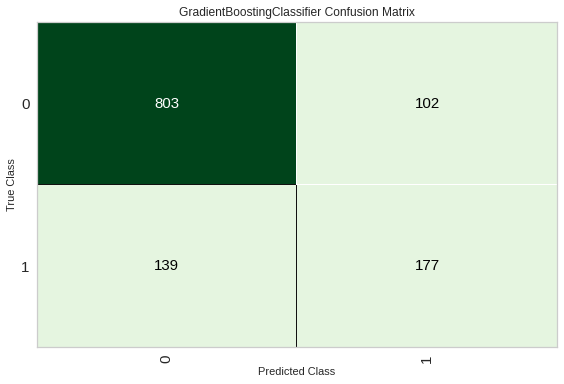

In [30]:
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')

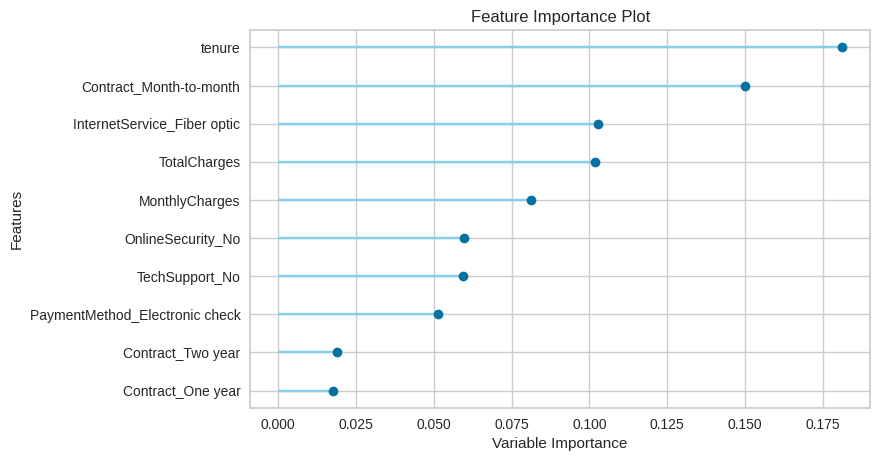

In [31]:
plot_model(estimator = tuned_gbc, plot = 'feature')

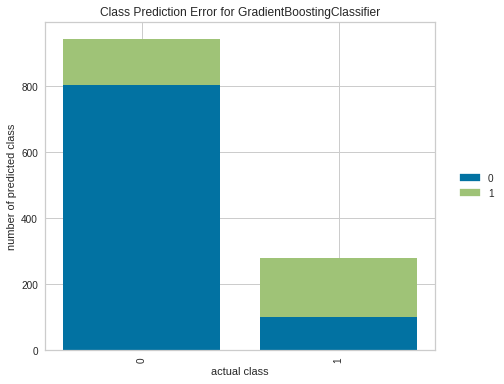

In [ ]:
plot_model(estimator = tuned_gbc, plot = 'error')

In [ ]:
evaluate_model(tuned_gbc)

In [35]:
pred_final = predict_model(tuned_gbc, data=df_test_eda)
pred_final.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Label,Score
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5027,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,23.0,20.00,445.30,0,0.9697
1733,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,61.0,99.00,5969.30,0,0.7730
5384,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,36.0,84.75,3050.15,0,0.5262
6554,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,61.0,61.45,3751.15,0,0.9746
364,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,47.0,20.55,945.70,0,0.9836


In [51]:
indice_test = df_test_eda.index
indice_test

Int64Index([5027, 1733, 5384, 6554,  364, 2093, 6966, 5076, 5746, 5461,
            ...
            5546, 6847, 3325, 5821, 1805, 4897, 6940,  804, 1143, 5773],
           dtype='int64', name='id', length=1409)

In [60]:
output_filename = 'subm_gbc.csv'
Churn = pred_final['Label'].dropna().astype(int).values
subm_k = pd.DataFrame(Churn,indice_test)
subm_k = subm_k.rename(columns={0: 'Churn'})
output_filename = 'subm_gbc.csv'
subm_k.to_csv()

'id,Churn\n5027,0\n1733,0\n5384,0\n6554,0\n364,0\n2093,0\n6966,0\n5076,0\n5746,0\n5461,0\n169,0\n3982,1\n4625,1\n5417,0\n987,0\n3117,0\n5233,0\n4626,1\n6992,1\n1149,1\n5297,0\n3633,0\n1434,0\n3793,1\n4090,1\n6770,0\n3718,0\n786,0\n4619,1\n1809,1\n6375,0\n5544,1\n2790,1\n1354,0\n6376,1\n6668,1\n7004,0\n4091,0\n4511,0\n1174,0\n6415,0\n2943,0\n5554,1\n196,0\n4974,0\n3628,0\n1744,0\n5885,0\n3337,0\n3063,0\n6420,0\n5529,0\n2904,0\n3571,0\n2000,1\n2662,0\n3405,0\n2852,0\n5565,0\n2030,0\n2560,0\n6120,0\n5835,0\n3787,0\n3510,1\n5337,0\n1760,0\n3667,0\n307,1\n2814,0\n6270,0\n2484,0\n2230,1\n5710,0\n2676,0\n1719,0\n2663,1\n4570,0\n1397,0\n3798,0\n2552,0\n2617,0\n5324,1\n3044,1\n5018,0\n3408,0\n4660,0\n2393,1\n3780,0\n1365,0\n725,1\n3052,0\n131,1\n1933,0\n3301,0\n3552,1\n335,1\n6130,0\n882,0\n587,0\n6849,1\n5404,0\n5635,0\n3889,1\n5726,0\n1504,0\n2250,0\n377,1\n3928,0\n705,0\n2669,0\n1996,1\n5481,1\n6804,0\n5981,0\n964,0\n2673,0\n881,0\n5714,0\n1473,1\n5581,0\n6965,0\n3137,1\n4454,1\n6938,0\n6173